In [1]:
## Importation of basic rotutine
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import ticker, cm
from scipy import linalg as LA
from math import sin, cos, pi, log
import cmath
import import_ipynb

## Importation of Spectral tools
from Spectral_tools import * #D1_CL, D2_CL,matrice_random, norm_2, Pseudospectrum



# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

importing Jupyter notebook from Spectral_tools.ipynb


In [2]:
# Number of points n= N+1
#N = 100
def Davies(N, L, c, xmin,xmax,ymin,ymax,Nxgrid,Nygrid,heights,fl,epsilon):
 
    # Spectral Differentiation, identity and Zero matrices
    xt = [D1_CL(N)[0]]
    #xt = [D1_CG(N)[0]]
    x = np.transpose(xt)
    D1 = D1_CL(N)[1]
    D2 = D2_CL(N)[1]
    #D1 = D1_CG(N)[1]
    #D2 = D2_CG(N)[1]
    Id = np.eye(N+1)
    Zero = np.zeros((N+1,N+1))
    
    #Random matrix
    #V_random = Diagonal_Random_Matrix(N+1) - 0.5*Id
    V_random = matrice_random(N+1) - 0.5*Id
    V_random = V_random/norm_2(V_random)
    V_random = epsilon * V_random
    visualisation_matrix(V_random)
    norm_V_random = norm_2(V_random)
    #V_random = epsilon2*matrice_random(N+1)
    print("L2-norm of Random_Matrix = " ,  norm_V_random, "\n")
    print("log_10 (L2-norm of Random_Matrix) = " , log(norm_V_random,10), "\n")

    # Domain elements (rescaling to a domain [-L, L])
    #L = 10.
    x = L * x
    D1 = D1/L
    D2 = D2/L**2
    
    ### Matrix L definition
    #c = 1. + 3.j
    print("c = ", c)
    L = -D2 + c*x**2*Id + V_random
    print("L =", L)
    L_red = L[2:N,2:N]
    #print("L_red =", L_red)
    B = Id[2:N,2:N]
    
    # Test  first derivative
    #L = D1
    #LT = L.transpose()
    #LTL = np.dot(LT,L)
    #L_red = L[1:N+1,1:N+1]
    #B = Id[1:N+1,1:N+1]
    
    # Pseudospectrum    
    #xmin, xmax ,ymin,ymax, Nxgrid, Nygrid = -1., 50., 0., 50., 50, 50
    
    ##xmin, xmax ,ymin,ymax, Nxgrid, Nygrid = 0.86, 0.87, 0.495, 0.505, 50, 50
    ##xmin, xmax ,ymin,ymax, Nxgrid, Nygrid = -2., 2., -1., 20., 50, 50
    ##xmin, xmax ,ymin,ymax, Nxgrid, Nygrid = -110., 10., -100., 100., 50, 50
    ##heights = np.arange(0.0001, 0.001, 0.00025)
    ##heights = [1e-13,1e-11,1e-9,1e-7,1e-5,1e-3,1e-1,1e0, 1e1]
    
    
    ##heights = np.arange(0.0001, 0.001, 0.00025)
    ##heights = [1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,1e-9,1e-7,1e-5,1e-3,1e-1,1e0, 1e1]
    ##heights = [1e-4, 1e-3,1e-2,1e-1,1e0]
    ##print("heights =", heights)
    #fl = "c"
    Pseudospectrum(L_red,B,xmin,xmax,ymin,ymax,Nxgrid,Nygrid,heights,fl,log(norm_V_random,10))
    
    
    
    # Eigenvalues
    eigenvalues_L, eigenvectors_L = LA.eig(L_red)
    #eigenvalues_L = LA.eigvals(L,B)
   
    
    print("\n Eigenvalues = \n", eigenvalues_L)
    
    eigenvalues_L_Re = eigenvalues_L.real
    eigenvalues_L_Im = eigenvalues_L.imag


    
    return eigenvalues_L_Re, eigenvalues_L_Im, eigenvectors_L, x, xt

In [3]:
def Eigenvalues_Graphic(Re_lambda, Im_lambda):
    # Graphical ouput

    eigenvalues_L_Re, eigenvalues_L_Im = Re_lambda, Im_lambda
    
    #print(eigenvalues_L_Re)
    #print(eigenvalues_L_Im)
    
    
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)

    ax1.plot(eigenvalues_L_Re, eigenvalues_L_Im, "+")
    ax1.set_xlabel(r'$\mathrm{Re}(\omega_n)$')
    ax1.set_ylabel(r'$\mathrm{Im}(\omega_n)$')  
    #ax1.set_aspect('equal','datalim')
    f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
    g = lambda x,pos : "${}$".format(f._formatSciNotation('%10e' % x))
    ax1.xaxis.set_major_formatter(mticker.FuncFormatter(g))
    ax1.yaxis.set_major_formatter(mticker.FuncFormatter(g))
    
    fig1.suptitle(r'Eigenvalues of $L$ with $n=N+1=%5g$ points' %(N+1))
    ax1.grid()   
    #ax1.set_xlim(0.,500.)
    #ax1.set_ylim(-50.,50.)
    #ax1.axis([0,20,0,20])

    fig1.show()
    #fig.savefig("/home/jaramillo/Dropbox/Trabajo/Programacion/Python/Diagonalization/Eigenvalues_L.pdf")
    fig1.savefig("Eigenvalues_PT_Random.pdf")
    

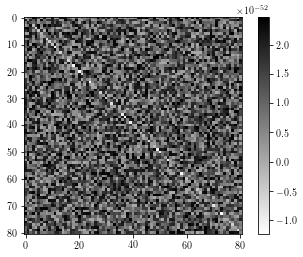

L2-norm of Random_Matrix =  1.0000000000000006e-50 

log_10 (L2-norm of Random_Matrix) =  -50.0 

c =  (1+3j)
L = [[-7.58158500e+04+108.j          1.20544961e+05  +0.j
  -6.52070981e+04  +0.j         ... -1.18682887e+02  +0.j
   1.18545687e+02  +0.j         -5.92500000e+01  +0.j        ]
 [-3.50547325e+04  +0.j          5.01691151e+04+107.83353602j
  -1.81858758e+04  +0.j         ... -9.03533649e+00  +0.j
   9.02486882e+00  +0.j         -4.51069160e+00  +0.j        ]
 [ 2.19345718e+03  +0.j         -8.44995742e+03  +0.j
   1.03938353e+04+107.33517039j ...  2.27019212e+00  +0.j
  -2.26754689e+00  +0.j          1.13333303e+00  +0.j        ]
 ...
 [ 1.13333303e+00  +0.j         -2.26754689e+00  +0.j
   2.27019212e+00  +0.j         ...  1.03938353e+04+107.33517039j
  -8.44995742e+03  +0.j          2.19345718e+03  +0.j        ]
 [-4.51069160e+00  +0.j          9.02486882e+00  +0.j
  -9.03533649e+00  +0.j         ... -1.81858758e+04  +0.j
   5.01691151e+04+107.83353602j -3.50547325e+04  +0.j

Spectral_tools.ipynb:313: UserWarning: The following kwargs were not used by contour: 'linewidth'
  "    fig = plt.figure()\n",
Spectral_tools.ipynb:337: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  "    fig.suptitle(r'Spectrum and Pseudospectrum of $L$ with $log||\\mathrm{Random}||_2=%3g$' % log_norm_Random)\n",



 N =
 38.0

 Eigenvalues = 
 [5.39615496e+04+107.78693545j 1.26964952e+04+107.0862711j
 9.40910983e+03+106.95513123j 4.20481635e+03+105.56775644j
 3.88575406e+03+105.46796304j 2.21855245e+03+103.4402728j
 2.11174442e+03+103.32784146j 1.37703327e+03+100.66367379j
 1.34217367e+03+100.56391448j 9.52938248e+02 +97.30172209j
 9.34469418e+02 +97.19492506j 7.03508825e+02 +93.36704559j
 6.94865866e+02 +93.27114589j 5.46295953e+02 +88.93825353j
 5.40713215e+02 +88.83996358j 4.39228230e+02 +84.06665368j
 4.36085135e+02 +83.98148003j 3.63428351e+02 +78.85439896j
 3.61147254e+02 +78.77340502j 3.07069513e+02 +73.37429094j
 3.05619947e+02 +73.31386703j 2.64071037e+02 +67.71925012j
 2.62929297e+02 +67.67750689j 2.30102021e+02 +61.92605586j
 2.29323209e+02 +61.9288533j  2.02739751e+02 +56.03222311j
 2.02152018e+02 +56.06756742j 1.80058391e+02 +50.10587496j
 1.79759755e+02 +49.99814075j 1.66849491e+02 +13.10409316j
 1.61096883e+02 +43.95952312j 1.60653908e+02 +43.90198691j
 1.51914789e+02 +28.5697416j

/home/jaramillo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


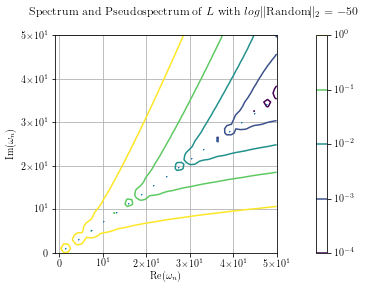

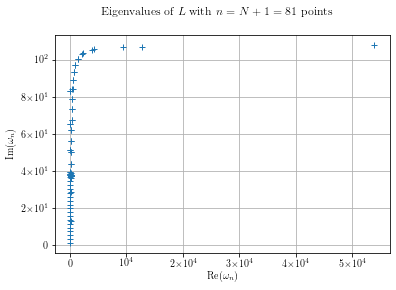

In [5]:
N, L, c, epsilon = 80, 6., 1.+3.j, 1e-50

xmin, xmax ,ymin,ymax, Nxgrid, Nygrid = -1., 50., 0., 50., 50, 50
heights = [1e-4, 1e-3,1e-2,1e-1,1e0]
fl = "c"

a, b, c, x, xt = Davies(N, L, c, xmin,xmax,ymin,ymax,Nxgrid,Nygrid,heights,fl,epsilon)
Eigenvalues_Graphic(a,b)